# pandas与模型代码的接口

In [1]:
# pandas与其他分析库通常是靠NumPy的数组联系起来的
# 将DataFrame转换为NumPy数组可以使用.value属性
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]
})

In [4]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [5]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [6]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [8]:
# 转换回DataFrame，可以传递一个二维ndarray，可以带有列名
df2 = pd.DataFrame(data.values, columns = ['one', 'two', 'three'])

In [9]:
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


当数据是均匀的时候使用.value属性（如全是数值类型），如果数据是不均匀的，结果是Python对象的ndarray。

In [10]:
df3 = data.copy()

In [11]:
df3['strings'] = ['a', 'b', 'c', 'd', 'e']

In [12]:
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [13]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [14]:
# 对于只想使用列的子集的情况，可以使用loc，用value作索引
model_cols = ['x0', 'x1']

In [15]:
data.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [16]:
# 假设数据集中有一个非数值列
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                 categories = ['a', 'b'])

In [17]:
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [18]:
# 若想替换category为虚变量，可以创建虚变量，删除category列，然后添加到结果
dummies = pd.get_dummies(data.category, prefix = 'category')

In [19]:
data_with_dummies = data.drop('category', axis = 1).join(dummies)

In [20]:
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


# 用Pasty创建模型描述

In [21]:
data  = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]
})

In [22]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [24]:
import patsy

In [25]:
y, X = patsy.dmatrices('y ~ x0 + x1', data)

In [26]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [27]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [3]:
# 这些Patsy的DesignerMatrix实例是NumPy的ndarray，带有附加元数据
import patsy
import numpy as np
import pandas as pd
data  = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]
})
y, X = patsy.dmatrices('y ~ x0 + x1', data)
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [4]:
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [5]:
patsy.dmatrices('y ~ x0 + x1 + 0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [6]:
# Patsy对象可以直接传递到算法中，它执行普通最小二乘回归
coef, resid, _, _ = np.linalg.lstsq(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [7]:
# 模型的元数据保留在design_info属性中，因此你可以重新附加列名到拟合系数，以获得一个Series
coef

array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [8]:
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)

In [9]:
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

### 用Patsy公式进行数据转换

In [10]:
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', data)

In [11]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [13]:
# 常见的变量转换包括标准化（平均值为0，方差为1）和中心化（减去平均值）
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', data)

In [14]:
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [15]:
# patsy.build_design_matrices函数可以使用原始样本数据集的保存信息，来转换新数据
new_data = pd.DataFrame({'x0': [6, 7, 8, 9],
                         'x1': [3.1, -0.5, 0, 2.3],
                         'y': [1, 2, 3, 4]})

In [16]:
new_X = patsy.build_design_matrices([X.design_info], new_data)

In [17]:
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [18]:
# Patsy中的加号不是加法的意义，当按照名称将数据集的列相加时，必须用特殊I函数将它们封装起来
y, X = patsy.dmatrices('y ~ I(x0 + x1)', data)

In [19]:
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

## 分类数据和Patsy

In [20]:
# 当在Patsy公式中使用非数值数据，会默认转换为虚变量。如果有截距，会去掉一个，避免共线性
data = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
                     'key2': [0, 1, 0, 1, 0, 1, 0, 0],
                     'v1': [1, 2, 3, 4, 5, 6, 7, 8],
                     'v2': [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
                    })

In [21]:
y, X = patsy.dmatrices('v2 ~ key1', data)

In [22]:
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [23]:
# 如果从模型中忽略截距，每个分类值的列都会包括在设计矩阵的模型中
y, X = patsy.dmatrices('v2 ~ key1 + 0', data)

In [24]:
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [25]:
# 使用C函数，数值列可以截取为分类量
y, X = patsy.dmatrices('v2 ~ C(key2)', data)

In [26]:
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [27]:
# 当在模型中使用多个分类名，会包括key1:key2形式的相交部分，它可以用在方差（ANOVA）模型分析中
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})

In [28]:
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [30]:
y, X = patsy.dmatrices('v2 ~ key1 + key2', data)

In [31]:
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [32]:
 y, X = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data)

In [33]:
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

# statsmodels介绍

## 估计线性模型

In [55]:
# statsmodels的线性模型有两种不同的接口：基于数组和基于公式
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)

In [37]:
np.random.seed(12345)

In [38]:
N = 100
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]

In [39]:
y = np.dot(X, beta) + eps

In [40]:
X[:5]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097],
       [-0.35147471, -0.71960511, -0.25821463],
       [ 1.2432688 , -0.37379916, -0.52262905]])

In [41]:
y[:5]

array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

In [42]:
# 线性模型通常要拟合一个截距。sm.add_constant函数可以添加一个截距的列到现存的矩阵
X_model = sm.add_constant(X)

In [44]:
X_model[:5]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

In [45]:
# sm.OLS类可以拟合一个普通最小二乘回归
model = sm.OLS(y, X)

In [48]:
# 这个模型的fit方法返回了一个回归结果对象，它包含估计的模型参数和其它内容
results = model.fit()

In [49]:
results.params

array([0.17826108, 0.22303962, 0.50095093])

In [50]:
# 对结果使用summary方法可以打印模型的详细诊断结果
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     24.42
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           7.44e-12
Time:                        12:41:10   Log-Likelihood:                -34.305
No. Observations:                 100   AIC:                             74.61
Df Residuals:                      97   BIC:                             82.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1783      0.053      3.364      0.0

In [51]:
# 假设所有的模型参数都在一个DataFrame中
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])

In [52]:
data['y'] = y

In [53]:
data[:5]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


In [56]:
# 使用statsmodels的公式API和Patsy的公式字符串
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()

In [57]:
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [58]:
 results.tvalues

Intercept    0.952188
col0         3.319754
col1         4.850730
col2         6.303971
dtype: float64

In [59]:
# 给出一个样本外数据，你可以根据估计的模型参数计算预测值
results.predict(data[:5])

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

## 估计时间序列过程

In [60]:
# 用自回归结构和噪声来模拟一些时间序列数据
init_x = 4
import random
values = [init_x, init_x]
N = 1000
b0 = 0.8
b1 = -0.4
noise = dnorm(0, 0.1, N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]
    values.append(new_x)

In [61]:
# 这个数据有AR(2)结构（两个延迟），参数是0.8和-0.4
# 拟合AR模型时，你可能不知道滞后项的个数，因此可以用较多的滞后量来拟合这个模型
MAXLAGS = 5

In [62]:
model = sm.tsa.AR(values)

In [64]:
results = model.fit(MAXLAGS)

In [65]:
 results.params

array([-0.00616093,  0.78446347, -0.40847891, -0.01364148,  0.01496872,
        0.01429462])

# scikit-learn介绍

In [67]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [68]:
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [69]:
# statsmodels和scikit-learn通常不能接收缺失数据，因此我们要查看列是否包含缺失值
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [71]:
# 用年龄作为预测值，用训练数据集的中位数补全两个表的空值
impute_value = train['Age'].median()

In [72]:
train['Age'] = train['Age'].fillna(impute_value)

In [73]:
test['Age'] = test['Age'].fillna(impute_value)

In [74]:
# 增加一个列IsFemale，作为“Sex”列的编码
train['IsFemale'] = (train['Sex'] == 'female').astype(int)

In [75]:
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [76]:
# 确定一些模型变量，并创建NumPy数组
predictors = ['Pclass', 'IsFemale', 'Age']

In [79]:
X_train = train[predictors].values

In [80]:
X_test = test[predictors].values

In [81]:
y_train = train['Survived'].values

In [82]:
Xtrain[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [84]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [87]:
# 用scikit-learn的LogisticRegression模型，创建一个模型实例
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression()

In [89]:
# 可以用模型的fit方法，将它拟合到训练数据
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
# 可以用model.predict，对测试数据进行预测
y_predict = model.predict(X_test)

In [92]:
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

如果有测试数据集的真是值，可以计算准确率或其它错误度量值

(y_true == y_predict).mean()

In [95]:
# logisticregressioncv类可以用一个参数指定网格搜索对模型的正则化参数C的粒度
from sklearn.linear_model import LogisticRegressionCV

In [96]:
modelcv = LogisticRegressionCV(10)

In [97]:
modelcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [98]:
# 交叉验证带有四个不重叠训练数据的模型
from sklearn.model_selection import cross_val_score

In [99]:
model = LogisticRegression(C=10)

In [102]:
scores = cross_val_score(model, X_train, y_train, cv=4)

In [103]:
scores

array([0.77232143, 0.80269058, 0.77027027, 0.78828829])

# 数据分析案例

In [104]:
# 只读取某个文件中的第一行
path = 'example.txt'

In [105]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [106]:
# Python有内置或第三方模块可以将JSON字符串转换成Python字典对象
# 这里使用json模块及其loads函数逐行加载已经下载好的数据文件
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)]

In [107]:
# records对象就成为一组Python字典了
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [108]:
# 假设我们想要知道该数据集中最常出现的是哪个时区（即tz字段）

In [110]:
# 首先，我们用列表推导式取出一组时区
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [112]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [116]:
# 用标准Python对时区计数，是在遍历时区的过程中将计数值保存在字典中
def get_counts(sequence):
    counts = {}
    for x in sequence: 
        if x in counts: 
            counts[x] += 1 
        else: 
            counts[x] = 1 
    return counts

In [117]:
# 使用Python标准库的更高级工具
from collections import defaultdict

def get_counts2(sequence): 
    counts = defaultdict(int)
    for x in sequence: 
        counts[x] += 1 
    return counts

In [118]:
# 用它对时区进行处理，只需将time_zones传入即可
counts = get_counts(time_zones)

In [120]:
counts['America/New_York']

1251

In [121]:
 len(time_zones)

3440

In [124]:
# 想要得到前10位的时区及其计数值，我们需要用到一些有关字典的处理技巧
def top_counts(count_dict, n=10): 
    value_key_pairs = [(count, tz) for tz, count in
count_dict.items()] 
    value_key_pairs.sort() 
    return value_key_pairs[-n:]

In [126]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [127]:
# collections.Counter类，它可以使这项工作更简单
from collections import Counter

In [128]:
counts = Counter(time_zones)

In [129]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## 用pandas对时区进行计数

In [130]:
import pandas as pd

In [131]:
 frame = pd.DataFrame(records)

In [132]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [133]:
 frame['tz'][:11]

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                        
8                        
9                        
10    America/Los_Angeles
Name: tz, dtype: object

In [134]:
# 这里frame的输出形式是摘要视图（summary view），主要用于较大的DataFrame对象
# 然后可以对Series使用value_counts方法
tz_counts = frame['tz'].value_counts()

In [135]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [136]:
# 用matplotlib可视化这个数据
# 为此，先给记录中未知或缺失的时区填上一个替代值
# fillna函数可以替换缺失值（NA），而未知值（空字符串）则可以通过布尔型数组索引加以替换
clean_tz = frame['tz'].fillna('Missing')

In [139]:
clean_tz[clean_tz == ''] = 'Unknown'

In [140]:
tz_counts = clean_tz.value_counts()

In [141]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [142]:
# 可以用seaborn包创建水平柱状图
import seaborn as sns

In [143]:
subset = tz_counts[:10]

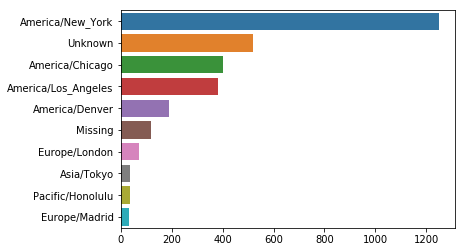

In [145]:
sns.barplot(y=subset.index, x=subset.values)

In [147]:
# a字段含有执行URL短缩操作的浏览器、设备、应用程序的相关信息
frame['a'][1]

'GoogleMaps/RochesterNY'

In [148]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [149]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [151]:
# 将这些"agent"字符串中的所有信息都解析出来是一件挺郁闷的工作
# 。一种策略是将这种字符串的第一节（与浏览器大致对应）分离出来并得到另外一份用户行为摘要
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [152]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [154]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [155]:
# 假设你想按Windows和非Windows用户对时区统计信息进行分解
# 为了简单起见，我们假定只要agent字符串中含有"Windows"就认为该用户为Windows用户。由于有的agent缺失，所以首先将它们从数据中移除
cframe = frame[frame.a.notnull()]

In [156]:
# 然后计算出各行是否含有Windows的值
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [158]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [159]:
# 接下来就可以根据时区和新得到的操作系统列表对数据进行分组了
by_tz_os = cframe.groupby(['tz', 'os'])

In [160]:
# 分组计数，类似于value_counts函数，可以用size来计算。并利用unstack对计数结果进行重塑
agg_counts = by_tz_os.size().unstack().fillna(0)

In [161]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [162]:
# 最后，选取最常出现的时区。
# 为了达到这个目的，我根据agg_counts中的行数构造了一个间接索引数组
indexer = agg_counts.sum(1).argsort()

In [163]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [165]:
# 通过take按照这个顺序截取了最后10行最大值
count_subset = agg_counts.take(indexer[-10:])

In [166]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [168]:
# pandas有一个简便方法nlargest，可以做同样的工作
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [169]:
# 传递一个额外参数到seaborn的barpolt函数，来画一个堆积条形图
count_subset = count_subset.stack()

In [171]:
count_subset.name = 'total'

In [172]:
count_subset = count_subset.reset_index()

In [173]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


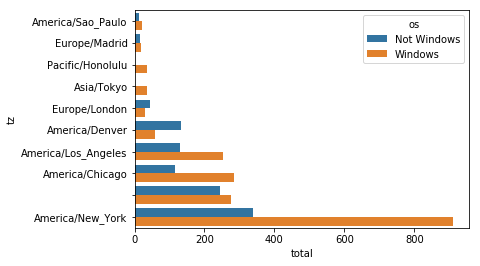

In [174]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [175]:
# 这张图不容易看出Windows用户在小分组中的相对比例，因此标准化分组百分比之和为1
def norm_total(group): 
    group['normed_total'] = group.total / group.total.sum() 
    return group

results = count_subset.groupby('tz').apply(norm_total)

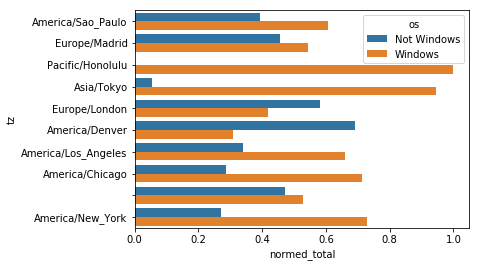

In [177]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)